# Credit Card Lead Prediction

Steps performed in study
- Loading data set
- Data cleaning
- Imputing null values
- EDA
- Data preparation
- Logistic Regression
- PCA
- Decision tree
- Random forest
- XGBoost
- ANN
- Feature importance and business conclusions

## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve ,confusion_matrix , precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Train data

In [ ]:
path = "/content/drive/MyDrive/Analytics Vidya Job-A-Thon/train_s3TEQDk.csv"
df_credit_data = pd.read_csv(path)
df_credit_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
path = "/content/drive/MyDrive/Analytics Vidya Job-A-Thon/test_mSzZ8RL.csv"
df_final_test = pd.read_csv(path)
df_final_test = df_final_test.set_index('ID')
df_final_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
#inpsect shape of data frame
df_credit_data.shape

(245725, 11)

In [ ]:
#inpsect data types
df_credit_data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
# inpsect the summary of the data
df_credit_data.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,ZISC4SNY,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [ ]:
df_credit_data['Bal_Vintage'] = df_credit_data['Avg_Account_Balance'] / df_credit_data['Vintage']
df_credit_data['Age_Vintage'] = df_credit_data['Age'] * df_credit_data['Vintage']
df_credit_data['Bal_Age'] = df_credit_data['Avg_Account_Balance'] / df_credit_data['Age']

In [ ]:
df_final_test['Bal_Vintage'] = df_final_test['Avg_Account_Balance'] / df_final_test['Vintage']
df_final_test['Age_Vintage'] = df_final_test['Age'] * df_final_test['Vintage']
df_final_test['Bal_Age'] = df_final_test['Avg_Account_Balance'] / df_final_test['Age']

## Data Cleaning

### Missing Value Inspection

In [ ]:
#Percentage of missing values column-wise
round(df_credit_data.isnull().sum() * 100 / df_credit_data.shape[0], 2)

ID                      0.00
Gender                  0.00
Age                     0.00
Region_Code             0.00
Occupation              0.00
Channel_Code            0.00
Vintage                 0.00
Credit_Product         11.93
Avg_Account_Balance     0.00
Is_Active               0.00
Is_Lead                 0.00
Bal_Vintage             0.00
Age_Vintage             0.00
Bal_Age                 0.00
dtype: float64

In [ ]:
# Imputing null values in Credit_Product column
print(df_credit_data['Credit_Product'].unique())
print(df_credit_data['Credit_Product'].value_counts())

['No' nan 'Yes']
No     144357
Yes     72043
Name: Credit_Product, dtype: int64


In [ ]:
## Clearly, 'No' has almost double the frequency than 'Yes' and it makes sense the for records 
## with no purchased credit product, value can be missing, Hence, imputing 'No' in NaN columns
df_credit_data[['Credit_Product']] = df_credit_data[['Credit_Product']].apply(lambda x: x.fillna('Yes'))

In [ ]:
#Verifying Percentage of missing values column-wise
round(df_credit_data.isnull().sum() * 100 / df_credit_data.shape[0], 2)

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
Bal_Vintage            0.0
Age_Vintage            0.0
Bal_Age                0.0
dtype: float64

In [ ]:
## Applying same imputation as on train dataset
df_final_test[['Credit_Product']] = df_final_test[['Credit_Product']].apply(lambda x: x.fillna('Yes'))

## Exploratory Data Analysis

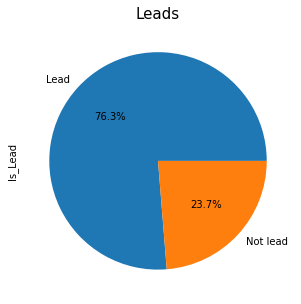

In [ ]:
# plot the Is_Lead ratio
plt.figure(figsize = [5,5])
plt.title('Leads', fontsize = 15)
df_credit_data.Is_Lead.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Lead', 'Not lead'])
plt.show()

There exists class imbalance in the target variable, i.e., lead to non lead ratio is approx 3 : 1

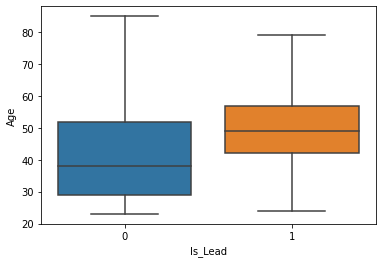

In [ ]:
# age vs lead customers. 
sns.boxplot(x = 'Is_Lead', y = 'Age', data = df_credit_data, showfliers = False)

People of age betwen 23 and 80 are likely to be converted into lead. Mean age of people turned into lead is 50

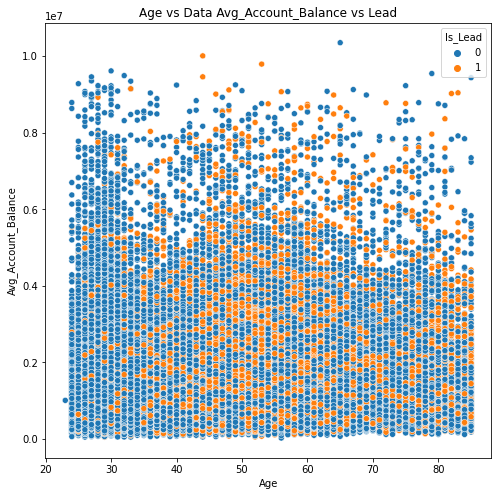

In [ ]:
plt.figure(figsize = [8, 8])
plt.title('Age vs Data Avg_Account_Balance vs Lead')
sns.scatterplot(x = 'Age', y = 'Avg_Account_Balance', hue = 'Is_Lead', data = df_credit_data)
plt.show()

## Data Preparation

### Remove highly correlated columns

In [ ]:
#Selecting columns which have absolute correlation greater than 70%
# Create correlation matrix
corr_matrix = df_credit_data.corr().abs()
print(corr_matrix)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
df_credit_data.drop(to_drop, axis = 1, inplace = True)

                          Age   Vintage  ...  Age_Vintage   Bal_Age
Age                  1.000000  0.631242  ...     0.780971  0.266543
Vintage              0.631242  1.000000  ...     0.957385  0.127213
Avg_Account_Balance  0.145232  0.167433  ...     0.174605  0.860603
Is_Lead              0.230814  0.279642  ...     0.267538  0.059908
Bal_Vintage          0.273056  0.455578  ...     0.414784  0.770188
Age_Vintage          0.780971  0.957385  ...     1.000000  0.165605
Bal_Age              0.266543  0.127213  ...     0.165605  1.000000

[7 rows x 7 columns]


In [ ]:
df_credit_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Bal_Vintage
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,24318.511628
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,18187.125000
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,57089.038462
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,24760.736842
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,26872.333333


In [ ]:
#Selecting columns which have absolute correlation greater than 70%
# Create correlation matrix
corr_matrix = df_final_test.corr().abs()
print(corr_matrix)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
df_final_test.drop(to_drop, axis = 1, inplace = True)

                          Age   Vintage  ...  Age_Vintage   Bal_Age
Age                  1.000000  0.622310  ...     0.775627  0.268366
Vintage              0.622310  1.000000  ...     0.956587  0.123943
Avg_Account_Balance  0.136453  0.164756  ...     0.170593  0.862658
Bal_Vintage          0.274324  0.454844  ...     0.414979  0.774940
Age_Vintage          0.775627  0.956587  ...     1.000000  0.164052
Bal_Age              0.268366  0.123943  ...     0.164052  1.000000

[6 rows x 6 columns]


### Dropping ID Column

In [ ]:
df_credit_data.drop(['ID'], axis = 1, inplace = True)

In [ ]:
df_credit_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Bal_Vintage
0,Female,73,RG268,Other,X3,43,No,1045696,No,0,24318.511628
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0,18187.125000
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,57089.038462
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0,24760.736842
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0,26872.333333


### Dummification of categorical columns

In [ ]:
cat_cols = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [ ]:
df_credit_data = pd.get_dummies(df_credit_data, columns = cat_cols, drop_first = True)

In [ ]:
df_credit_data.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Bal_Vintage,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,43,1045696,0,24318.511628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,30,32,581988,0,18187.125000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,56,26,1484315,0,57089.038462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,34,19,470454,0,24760.736842,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,30,33,886787,0,26872.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Inspecting shape
df_credit_data.shape

(245725, 48)

In [ ]:
df_final_test = pd.get_dummies(df_final_test, columns = cat_cols, drop_first = True)

In [ ]:
df_final_test.shape

(105312, 47)

## Modelling

### Split into train and test dataset

In [ ]:
#Splitting the dataframe to 70% train and 30% validation
df_train, df_test = train_test_split(df_credit_data, train_size=0.9, random_state=42)
print(df_train.shape)
print(df_test.shape)

(221152, 48)
(24573, 48)


In [ ]:
y_train = df_train['Is_Lead']
X_train = df_train.drop('Is_Lead', axis = 1)

In [ ]:
y_test = df_test['Is_Lead']
X_test = df_test.drop('Is_Lead', axis = 1)

In [ ]:
result_column_names = ["Model", "AuC Score"]
model_results = pd.DataFrame(columns = result_column_names)

### Scaling numerical columns

In [ ]:
num_cols = ['Age', 'Vintage', 'Avg_Account_Balance', 'Bal_Vintage']

In [ ]:
# scaling using Min Max Scaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,Age,Vintage,Avg_Account_Balance,Bal_Vintage,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
200899,-1.002146,-1.018712,-0.762199,-0.051512,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
115788,0.210876,-0.122526,-0.468413,-0.498356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
40279,-0.934756,-0.431555,0.239253,0.114344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
44042,-0.260855,0.680951,0.233834,-0.437637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
210226,0.547826,-0.987809,1.026566,2.551758,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1


In [ ]:
# sc = StandardScaler()
# X = sc.fit(df_credit_data[num_cols])
df_final_test[num_cols] = scaler.transform(df_final_test[num_cols])

In [ ]:
df_final_test.head()

,Age,Vintage,Avg_Account_Balance,Bal_Vintage,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VBENBARO,-1.002146,-0.678779,-0.451950,-0.165483,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
CCMEWNKY,-0.058684,0.062892,-0.237895,-0.447430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
VK3KGA9M,-0.867366,-1.018712,-1.067123,-0.537800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
TT8RPZVC,-1.002146,-0.431555,-0.305051,-0.253919,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
SHQZEYTZ,-1.002146,-0.864197,-0.551607,-0.037925,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
a

NameError: ignored

### Logistic Regression using RFE

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')

In [ ]:
# running RFE with 20 variables as output
rfe = RFE(log_reg, 20)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
# get supported columns from RFE
rfe_col = ['Age', 'Vintage', 'Region_Code_RG255', 'Region_Code_RG268',
       'Region_Code_RG269', 'Region_Code_RG271', 'Region_Code_RG273',
       'Region_Code_RG276', 'Region_Code_RG277', 'Region_Code_RG279',
       'Region_Code_RG281', 'Region_Code_RG283', 'Region_Code_RG284',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Yes']#X_train.columns[rfe.support_]
rfe_col

In [ ]:
### Assessing model using StatsModel
X_train_sm = sm.add_constant(X_train[rfe_col])
log_reg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_reg.fit()
res.summary()

In [ ]:
### Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Due to high P-value, removing 'Region_Code_RG271'
rfe_col = rfe_col.drop('Region_Code_RG271')

In [ ]:
# X_train_sm = sm.add_constant(X_train[rfe_col])
log_reg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_reg.fit()
res.summary()

In [ ]:
X_test_log_req = X_test[rfe_col]
X_test_log_req.head()

In [ ]:
log_reg_final = LogisticRegression(class_weight='balanced')
log_reg_final.fit(X_train[rfe_col], y_train)
y_test_pred = log_reg_final.predict_proba(X_test_log_req)[:, 1]
y_test_pred

In [ ]:
print("AUC score: ", round(roc_auc_score(y_test, y_test_pred),2))

In [ ]:
y_train_pred = log_reg_final.predict_proba(X_train[rfe_col])[:, 1]
print("AUC score: ", round(roc_auc_score(y_train, y_train_pred),2))

In [ ]:
y_final_test_pred = log_reg_final.predict_proba(df_final_test[rfe_col])[:, 1]
y_final_test_pred

In [ ]:
df_final_test['Is_Lead'] = y_final_test_pred
df_final_test['Is_Lead'].to_csv('LR.csv')
df_final_test.drop('Is_Lead', axis = 1, inplace = True)

Logistic regression using RFE gives AUC score as 73%

In [ ]:
model_results = model_results.append({ 
    result_column_names[0]: 'Logistic Regression using RFE', 
    result_column_names[1]: roc_auc_score(y_test, y_test_prob) }, ignore_index = True)
model_results

### Logistic Regression using PCA

In [ ]:
#initialize and fit pca
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

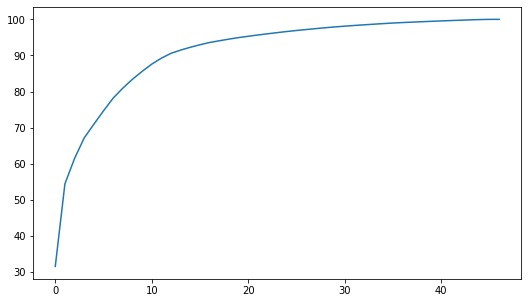

In [ ]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.31520306, 0.54416889, 0.6145628 , 0.67144792, 0.70944223,
       0.74645676, 0.78171212, 0.80936697, 0.83397042, 0.8557789 ,
       0.87591744, 0.89249807, 0.9059253 , 0.91488647, 0.92265088,
       0.92964268, 0.9359339 , 0.94062543, 0.94525135, 0.94945275,
       0.95309833, 0.95664241, 0.96000532, 0.96319026, 0.96630402,
       0.96913417, 0.97177236, 0.97433618, 0.97679855, 0.97908563,
       0.98114142, 0.98305913, 0.9848575 , 0.98657252, 0.98824147,
       0.98982434, 0.99112377, 0.99232835, 0.99347796, 0.99459348,
       0.9956876 , 0.99666582, 0.99760632, 0.99853215, 0.99943813,
       0.99995655, 1.        ])

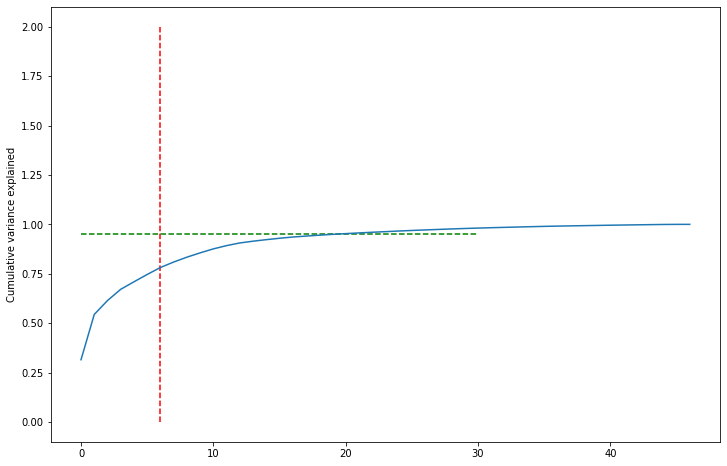

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=6, ymax=2, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
pca_final = PCA(0.99, svd_solver='full')

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

(221152, 37)

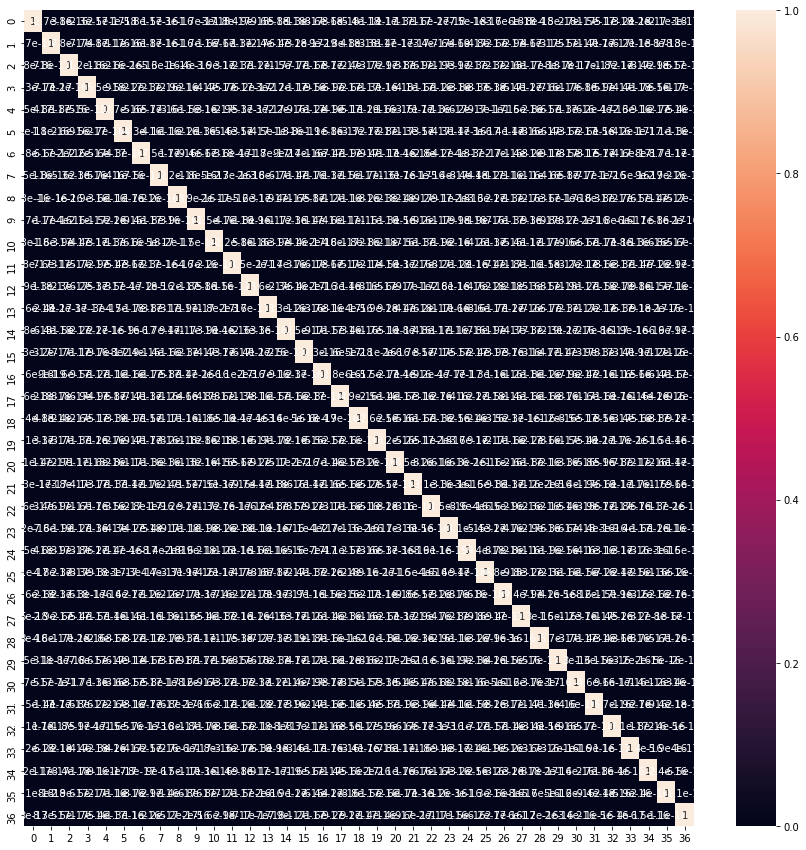

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(24573, 37)

In [ ]:
df_final_test_pca = pca_final.transform(df_final_test)
df_final_test_pca.shape

(105312, 37)

In [ ]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# hyperparameter space
params = {'C': [1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(df_train_pca, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)
print(model.best_estimator_)

In [ ]:
y_pred_prob_train = model.predict_proba(df_train_pca)[:, 1]
print("AUC score (train):", round(roc_auc_score(y_train, y_pred_prob_train),2))

In [ ]:
y_pred_prob_test = model.predict_proba(df_test_pca)[:, 1]
print("AUC score (test):", round(roc_auc_score(y_test, y_pred_prob_test),2))

In [ ]:
y_final_test_pred = model.predict_proba(df_final_test_pca)[:, 1]
y_final_test_pred

In [ ]:
df_final_test['Is_Lead'] = y_final_test_pred
df_final_test['Is_Lead'].to_csv('LR_PCA.csv')
df_final_test.drop('Is_Lead', axis = 1, inplace = True)

In [ ]:
model_results = model_results.append({ 
    result_column_names[0]: 'Logistic Regression using PCA', 
    result_column_names[1]: roc_auc_score(y_train, y_pred_prob_train) }, ignore_index = True)
model_results

### Decision Tree classifier using PCA

In [ ]:
dsTree = DecisionTreeClassifier(class_weight = 'balanced')
dsTreeParams = {
            'max_depth': [10, 20],
            'min_samples_leaf': [50, 100, 200]}

dsFolds = KFold(n_splits = 5, random_state = 42)

dsTreeModel = GridSearchCV(estimator = dsTree, cv = dsFolds, param_grid = dsTreeParams, 
                           scoring='roc_auc', verbose = 1, n_jobs = -1)

In [ ]:
# fit model
dsTreeModel.fit(df_train_pca, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", dsTreeModel.best_score_)
print("Best hyperparameters: ", dsTreeModel.best_params_)

In [ ]:
# check area under curve
y_train_pred_prob_ds = dsTreeModel.predict_proba(df_train_pca)[:, 1]
print("AUC score on train data:", round(roc_auc_score(y_train, y_train_pred_prob_ds),2))

In [ ]:
# check area under curve
y_test_pred_prob_ds = dsTreeModel.predict_proba(df_test_pca)[:, 1]
print("AUC score on test data:", round(roc_auc_score(y_test, y_test_pred_prob_ds),2))

In [ ]:
model_results = model_results.append({ 
    result_column_names[0]: 'Decision Tree using PCA', 
    result_column_names[1]: roc_auc_score(y_train, y_train_pred_prob_ds) }, ignore_index = True)
model_results

In [ ]:
y_final_test = dsTreeModel.predict_proba(df_final_test_pca)[:, 1]
y_final_test

In [ ]:
df_final_test['Is_Lead'] = y_final_test
df_final_test['Is_Lead'].to_csv('DT_PCA.csv')
df_final_test.drop('Is_Lead', axis = 1, inplace = True)

### Random Forest

In [ ]:
#random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params = { 
            'max_depth': [25, 28, 30],
            'min_samples_leaf': [200, 300],
            'n_estimators': [100, 150, 200]}

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
rf_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, 
                        scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
rf_model.fit(X_train, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)

In [ ]:
# check area under curve
y_train_pred_prob_forest = rf_model.predict_proba(X_train)[:, 1]
print("AUC score:", round(roc_auc_score(y_train, y_train_pred_prob_forest),2))

In [ ]:
# check area under curve
y_test_pred_prob_forest = rf_model.predict_proba(X_test)[:, 1]
print("AUC score:", round(roc_auc_score(y_test, y_test_pred_prob_forest),2))

In [ ]:
model_results = model_results.append({ 
    result_column_names[0]: 'Random Forest', 
    result_column_names[1]: roc_auc_score(y_train, y_train_pred_prob_forest) }, ignore_index = True)
model_results

In [ ]:
y_final_test = rf_model.predict_proba(df_final_test)[:, 1]
y_final_test

In [ ]:
df_final_test['Is_Lead'] = y_final_test
df_final_test['Is_Lead'].to_csv('RF.csv')
df_final_test.drop('Is_Lead', axis = 1, inplace = True)

### Random Forest using PCA

In [ ]:
#random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest_pca = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params_pca = {
            'max_depth': [25, 28],
            'min_samples_leaf': [100, 200],
            'n_estimators': [200, 250]
}

# create 5 folds
folds_pca = KFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model_pca = GridSearchCV(estimator=forest_pca, cv=folds, param_grid=params_pca,
                            scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
rf_model_pca.fit(df_train_pca, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", rf_model_pca.best_score_)
print("Best hyperparameters: ", rf_model_pca.best_params_)

In [ ]:
# check area under curve
y_train_pred_prob_forest_pca = rf_model_pca.predict_proba(df_train_pca)[:, 1]
print("AUC score (train):", round(roc_auc_score(y_train, y_train_pred_prob_forest_pca),2))

In [ ]:
# check area under curve
y_test_pred_prob_forest_pca = rf_model_pca.predict_proba(df_test_pca)[:, 1]
print("AUC score (test):", round(roc_auc_score(y_train, y_test_pred_prob_forest_pca),2))

In [ ]:
model_results = model_results.append({ 
    result_column_names[0]: 'Random Forest using PCA', 
    result_column_names[1]: roc_auc_score(y_train, y_train_pred_prob_forest_pca) }, ignore_index = True)
model_results

In [ ]:
y_final_test = rf_model.predict_proba(df_final_test)[:, 1]
y_final_test

In [ ]:
df_final_test['Is_Lead'] = y_final_test
df_final_test['Is_Lead'].to_csv('RF_PCA.csv')
df_final_test.drop('Is_Lead', axis = 1, inplace = True)

### XGBoost using PCA

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# creating a KFold object 
folds_xg = KFold(n_splits = 2, shuffle = True, random_state = 4)

# specify range of hyperparameters
param_grid_xg = {
            'learning_rate': [0.07], 
             "eta"    : [0.07 ] ,
             "max_depth"        : [10 ],
             "min_child_weight" : [ 3 ],
             "gamma"            : [ 0.1 ],
             "colsample_bytree" : [ 0.3 ],
             'n_estimators': [500]
            }        


# specify model
xgb_model = XGBClassifier(scale_pos_weight = 3, early_stopping_rounds = 5)

# set up GridSearchCV()
model_cv_xg = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid_xg, 
                        scoring= 'roc_auc',
                        cv = folds_xg, 
                        n_jobs = 4,
                        verbose = 1,
                        return_train_score=True)

In [ ]:
model_cv_xg = XGBClassifier(scale_pos_weight = 6, 
                          early_stopping_rounds = 4,
                          learning_rate = 0.06,
                          max_depth = 12,
                          colsample_bytree = 0.7,
                          gamma = 0.2,
                          min_child_weight = 3,
                          subsample = 0.5,
                          n_estimators = 220)

In [ ]:
# fit the model
model_cv_xg.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, early_stopping_rounds=4,
              gamma=0.2, learning_rate=0.06, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=None, n_estimators=220, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_cv_xg.best_score_)
print("Best hyperparameters: ", model_cv_xg.best_params_)

In [ ]:
# check area under curve
y_train_pred_prob_xgb = model_cv_xg.predict_proba(df_train_pca)[:, 1]
print("AUC score (train):", round(roc_auc_score(y_train, y_train_pred_prob_xgb),2))

AUC score (train): 0.94


In [ ]:
# check area under curve
y_test_pred_prob_xgb = model_cv_xg.predict_proba(df_test_pca)[:, 1]
print("AUC score (test):", roc_auc_score(y_test, y_test_pred_prob_xgb))

AUC score (test): 0.8389676944537392


In [ ]:
model_results = model_results.append({ 
    result_column_names[0]: 'XGBoost using PCA', 
    result_column_names[1]: roc_auc_score(y_train, y_test_pred_prob_xgb) }, ignore_index = True)
model_results

In [ ]:
y_final_test = model_cv_xg.predict_proba(df_final_test_pca)[:, 1]
y_final_test

array([0.03928457, 0.811988  , 0.09617755, ..., 0.19723926, 0.6125057 ,
       0.13513921], dtype=float32)

In [ ]:
df_final_test['Is_Lead'] = y_final_test
df_final_test['Is_Lead'].to_csv('XG_PCA.csv')
df_final_test.drop('Is_Lead', axis = 1, inplace = True)

### ANN

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=df_train_pca.shape[0], activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(df_train_pca, y_train, batch_size = 64, epochs = 15)

In [ ]:
# check area under curve
y_train_pred_prob_ann = ann.predict_proba(df_train_pca)
print("AUC score (train):", round(roc_auc_score(y_train, y_train_pred_prob_ann),2))

In [ ]:
# check area under curve
y_test_pred_prob_ann = ann.predict_proba(df_test_pca)
print("AUC score (test):", round(roc_auc_score(y_test, y_test_pred_prob_ann),2))

In [ ]:
model_results = model_results.append({ 
    result_column_names[0]: 'ANN', 
    result_column_names[1]: roc_auc_score(y_test, y_test_pred_prob_ann) }, ignore_index = True)
model_results

In [ ]:
y_final_test = ann.predict_proba(df_final_test_pca)
y_final_test

In [ ]:
df_final_test['Is_Lead'] = y_final_test
df_final_test['Is_Lead'].to_csv('ANN.csv')
df_final_test.drop('Is_Lead', axis = 1, inplace = True)